<a href="https://colab.research.google.com/github/Jayden-Nyamiaka/Machine-Learning-and-Data-Mining/blob/main/nyamiaka_jayden_set5_prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/emiletimothy/Caltech-CS155-2023/blob/main/set5/set5_prob2.ipynb)


# Problem 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
arr = np.random.randint(-54, high=127, size=22)
print(arr)
men = arr.mean()
print(men)

[-35  86  83  51  37 -49 110  69  94 -36 -52  98  56  14  41  95  36  23
  67 -32 -37  76]
36.13636363636363


In [ ]:
arr_up = arr - arr.mean()
print(arr_up)
print(arr_up.mean())

[-71.13636364  49.86363636  46.86363636  14.86363636   0.86363636
 -85.13636364  73.86363636  32.86363636  57.86363636 -72.13636364
 -88.13636364  61.86363636  19.86363636 -22.13636364   4.86363636
  58.86363636  -0.13636364 -13.13636364  30.86363636 -68.13636364
 -73.13636364  39.86363636]
7.428401328401047e-15


In [ ]:
print(arr.mean())

38.59090909090909


In [ ]:
# download the dataset
!wget -O train.txt https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set5/data/train.txt
!wget -O test.txt https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set5/data/test.txt

--2023-02-23 05:01:37--  https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set5/data/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 685602 (670K) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>] 669.53K  --.-KB/s    in 0.01s   

2023-02-23 05:01:37 (68.5 MB/s) - ‘train.txt’ saved [685602/685602]

--2023-02-23 05:01:37--  https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set5/data/test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 293571 (

## 2C:
Fill in these functions to train your SVD

In [ ]:
"""
Takes as input Ui (the ith row of U), a training point Yij, the column
vector Vj (jth column of V^T), reg (the regularization parameter lambda),
and eta (the learning rate).

Returns the gradient of the regularized loss function with
respect to Ui multiplied by eta.
"""
def grad_U(Ui, Yij, Vj, reg, eta):
  res = Yij - Ui.dot(Vj)
  grad = eta * (reg * Ui - Vj * res)   
  return grad


"""
Takes as input the column vector Vj (jth column of V^T), a training point Yij,
Ui (the ith row of U), reg (the regularization parameter lambda),
and eta (the learning rate).

Returns the gradient of the regularized loss function with
respect to Vj multiplied by eta.
"""
def grad_V(Vj, Yij, Ui, reg, eta):
  res = Yij - Ui.dot(Vj)
  grad = eta * (reg * Vj - Ui * res)   
  return grad


"""
Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
j is the index of a movie, and Y_ij is user i's rating of movie j and
user/movie matrices U and V.

Returns the mean regularized squared-error of predictions made by
estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
"""
def get_err(U, V, Y, reg=0.0):
  residual_sum = 0
  for (i, j, Yij) in Y:
    res = Yij - (U[i - 1]).dot(V[j - 1])
    residual_sum += res*res
  square_err = 0.5 * residual_sum

  regularize = 0
  if (reg != 0):
    Ufro = np.linalg.norm(U, 'fro')
    Vfro = np.linalg.norm(V, 'fro')
    regularize = 0.5 * reg * (Ufro*Ufro + Vfro*Vfro)
  
  err = (regularize + square_err) / len(Y)
  return err


"""
Given a training data matrix Y containing rows (i, j, Y_ij)
where Y_ij is user i's rating on movie j, learns an
M x K matrix U and N x K matrix V such that rating Y_ij is approximated
by (UV^T)_ij.

Uses a learning rate of <eta> and regularization of <reg>. Stops after
<max_epochs> epochs, or once the magnitude of the decrease in regularized
MSE between epochs is smaller than a fraction <eps> of the decrease in
MSE after the first epoch.

Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
of the model.
"""
def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
  U = np.random.uniform(-0.5, 0.5, (M,K))
  V = np.random.uniform(-0.5, 0.5, (N,K))
  first_epoch_regMSE_decr = 0
  prev_regMSE = get_err(U, V, Y, reg)

  for epoch in range(max_epochs):
    # Prints training progress every 5 epochs
    if (epoch % 5 == 0):
      print("Epoch ", epoch)
    # Trains and updates U and V using SGD for each point
    shuffled_indices = np.random.permutation(len(Y))
    for idx in shuffled_indices:
      i, j, yij = Y[idx][0], Y[idx][1], Y[idx][2]
      gradientUi = grad_U(U[i - 1], yij, V[j - 1], reg, eta)
      gradientVj = grad_V(V[j - 1], yij, U[i - 1], reg, eta)
      U[i - 1] -= gradientUi
      V[j - 1] -= gradientVj
    # Computes new regularized MSE and compares it to previous
    regMSE = get_err(U, V, Y, reg)
    regMSE_decr = prev_regMSE - regMSE
    if (epoch == 0): # Stores the first epoch MSE decrease on the first iteration
      first_epoch_regMSE_decr = regMSE_decr
    else: # Checks stopping condition of decreasing regularized MSE
      if (regMSE_decr < eps * first_epoch_regMSE_decr): 
        break
    prev_regMSE = regMSE
  
  # Computes the unregularized MSE (reg = 0) and returns (U, V, err)
  return (U, V, get_err(U, V, Y, 0))


## 2D:
Run the cell below to get your graphs

Factorizing with  943  users,  1682  movies.
Epoch  0
Epoch  5
Epoch  10
Epoch  15
Epoch  20
Epoch  0
Epoch  5
Epoch  10
Epoch  15
Epoch  20
Epoch  0
Epoch  5
Epoch  10
Epoch  15
Epoch  20
Epoch  25
Epoch  0
Epoch  5
Epoch  10
Epoch  15
Epoch  20
Epoch  25
Epoch  0
Epoch  5
Epoch  10
Epoch  15


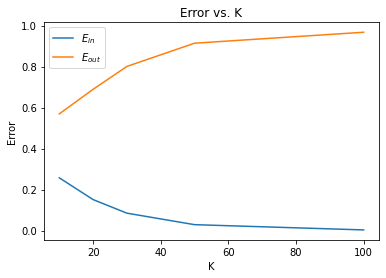

In [ ]:
Y_train = np.loadtxt('train.txt').astype(int)
Y_test = np.loadtxt('test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
print("Factorizing with ", M, " users, ", N, " movies.")
Ks = [10,20,30,50,100]

reg = 0.0
eta = 0.03 # learning rate
E_in = []
E_out = []

# Use to compute Ein and Eout
for K in Ks:
    U,V, err = train_model(M, N, K, eta, reg, Y_train)
    E_in.append(err)
    E_out.append(get_err(U, V, Y_test))

plt.plot(Ks, E_in, label='$E_{in}$')
plt.plot(Ks, E_out, label='$E_{out}$')
plt.title('Error vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2d.png')

## 2E:
Run the cell below to get your graphs. This might take a long time to run, but it should take less than 2 hours. I would encourage you to validate your 2C is correct.

Training model with M = 943, N = 1682, k = 10, eta = 0.03, reg = 0.0001
Epoch  0
Epoch  5
Epoch  10
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001
Epoch  0
Epoch  5
Epoch  10
Epoch  15
Epoch  20
Training model with M = 943, N = 1682, k = 30, eta = 0.03, reg = 0.0001
Epoch  0
Epoch  5
Epoch  10
Epoch  15
Epoch  20
Training model with M = 943, N = 1682, k = 50, eta = 0.03, reg = 0.0001
Epoch  0
Epoch  5
Epoch  10
Epoch  15
Epoch  20
Training model with M = 943, N = 1682, k = 100, eta = 0.03, reg = 0.0001
Epoch  0
Epoch  5
Epoch  10
Epoch  15
Training model with M = 943, N = 1682, k = 10, eta = 0.03, reg = 0.001
Epoch  0
Epoch  5
Epoch  10
Epoch  15
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001
Epoch  0
Epoch  5
Epoch  10
Epoch  15
Training model with M = 943, N = 1682, k = 30, eta = 0.03, reg = 0.001
Epoch  0
Epoch  5
Epoch  10
Epoch  15
Epoch  20
Epoch  25
Training model with M = 943, N = 1682, k = 50, eta = 0.03, reg = 0.001
Epoch  0
Ep

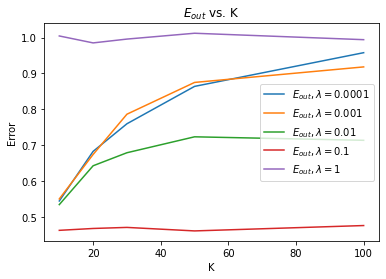

In [ ]:
Y_train = np.loadtxt('train.txt').astype(int)
Y_test = np.loadtxt('test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
Ks = [10,20,30,50,100]

regs = [10**-4, 10**-3, 10**-2, 10**-1, 1]
eta = 0.03 # learning rate
E_ins = []
E_outs = []

# Use to compute Ein and Eout
for reg in regs:
    E_ins_for_lambda = []
    E_outs_for_lambda = []

    for k in Ks:
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, k, eta, reg))
        U,V, e_in = train_model(M, N, k, eta, reg, Y_train)
        E_ins_for_lambda.append(e_in)
        eout = get_err(U, V, Y_test)
        E_outs_for_lambda.append(eout)

    E_ins.append(E_ins_for_lambda)
    E_outs.append(E_outs_for_lambda)


# Plot values of E_in across k for each value of lambda
for i in range(len(regs)):
    plt.plot(Ks, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
plt.title('$E_{in}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2e_ein.png')	
plt.clf()

# Plot values of E_out across k for each value of lambda
for i in range(len(regs)):
    plt.plot(Ks, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()	
plt.savefig('2e_eout.png')		
